

---

# 📄 Project Metadata
### **Title:** **Beyond the Iceberg: Feature Analysis for Titanic Survival** 🚢❄️
### **Author:** **Asad Ali** ✍️
### **Institute:** **University of Okara & Trainee at Codanics** 🎓
### **Email:** 📧 [asadalyy834@gmail.com](mailto:asadalyy834@gmail.com)
### **Course:** **Data Science / Machine Learning** 📊🧠
### **Date:** **Sep 2025** 📅
### **Version:** **1.0** 🔢
### **Language:** **Python** 🐍
### **Libraries Overview:**
- **Pandas** 📚: Data manipulation and analysis
- **NumPy** 🔢: Numerical computing
- **Scikit-learn** ⚙️: Machine learning tools and algorithms
- **Matplotlib** 📈: Data visualization
- **Seaborn** 🌊: Statistical data visualization
- **Plotly** 📊: Interactive data visualization
- **TensorFlow** 🤖: Deep learning framework for building and training neural networks
- **Keras** 🧠: High-level API for building and training deep learning models (runs on TensorFlow)
### **Dataset:** **Titanic Dataset from Kaggle Competition** 📋

---


# About the Dataset

| Column Name | What It Shows | Meaning in Simple Words |
|-------------|---------------|-------------------------|
| **PassengerId** | Unique passenger number | Just a serial number for each passenger (1, 2, 3, ...) |
| **Survived** | Survival status | Did the passenger survive? (0 = No, 1 = Yes) |
| **Pclass** | Ticket class | 1st, 2nd, or 3rd class ticket (1 = Rich, 3 = Poor) |
| **Name** | Passenger's full name | Complete name with title (Mr., Mrs., Dr., etc.) |
| **Sex** | Gender | Male or Female |
| **Age** | Age in years | How old the passenger was (babies have decimal ages like 0.5) |
| **SibSp** | Family members aboard | Number of siblings + spouses traveling together |
| **Parch** | Family members aboard | Number of parents + children traveling together |
| **Ticket** | Ticket number | The actual ticket code/number they had |
| **Fare** | Ticket price | How much they paid for the ticket (in British pounds) |
| **Cabin** | Cabin number | Which cabin they stayed in (like room number) |
| **Embarked** | Boarding port | Where they got on the ship (C=Cherbourg, Q=Queenstown, S=Southampton) |


# 1. **Importing Libraries**

In [653]:
# =============================================================================
# DATA MANIPULATION & NUMERICAL COMPUTING
# =============================================================================
import pandas as pd  # 📚 Data manipulation and analysis
import numpy as np   # 🔢 Numerical computing

# =============================================================================
# MACHINE LEARNING & DEEP LEARNING
# =============================================================================
# Traditional ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Deep Learning with TensorFlow/Keras
import tensorflow as tf  # 🧠 Deep learning framework
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2

# =============================================================================
# DATA VISUALIZATION
# =============================================================================
import matplotlib.pyplot as plt  # 📈 Basic plotting
import seaborn as sns           # 🌊 Statistical visualization
import plotly.express as px     # 📊 Interactive visualization
import plotly.graph_objects as go
import plotly.figure_factory as ff

# =============================================================================
# UTILITIES & SYSTEM
# =============================================================================
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import datetime
import time
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# =============================================================================
# SPECIALIZED LIBRARIES
# =============================================================================
import scipy.stats as stats  # Statistical functions
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from lightgbm import LGBMClassifier  # Light Gradient Boosting
from catboost import CatBoostClassifier  # Categorical data boosting

# 2. **Loading the Dataset**

In [654]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('gender_submission.csv')

# 3. **Data Preprocessing and Cleaning**

In [655]:
df = df_train.copy()
# Looking at the first few rows of the training dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [656]:
# Getting information about the Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 7 numerical features: `PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare`.

- There are 5 categorical features: `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked`.

In [657]:
# Checking the shape of the dataset
print(f"Training Data Shape: {df_train.shape}")
print(f"There are {df_train.shape[0]} passengers and {df_train.shape[1]} features in the training dataset.")

Training Data Shape: (891, 12)
There are 891 passengers and 12 features in the training dataset.


In [658]:
# Let's Getting the Statistical Summary of the Numerical Features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


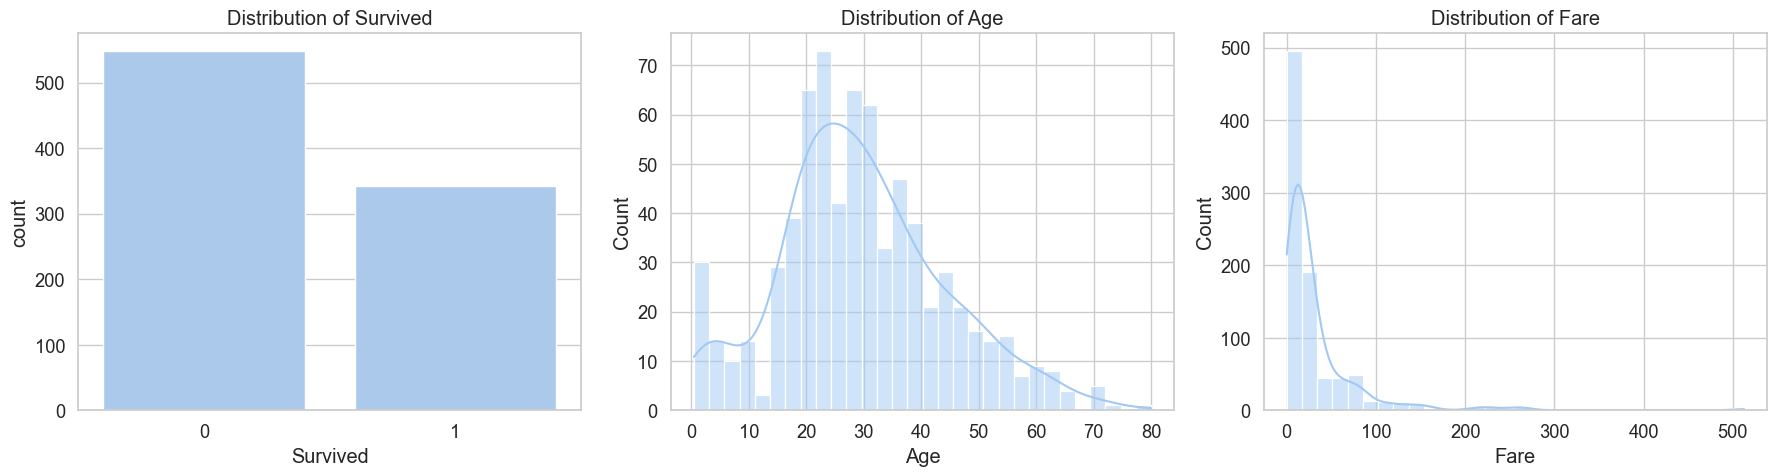

In [659]:
# Checking the distribution of Survived, Age, and Fare
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Survived', data=df, ax=axes[0])
axes[0].set_title('Distribution of Survived')
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Age')
sns.histplot(df['Fare'].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Fare')
plt.tight_layout()
plt.show()

In [660]:
# Let's check for missing values in the Dataset.
print(df.isnull().sum())
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of Missing Values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


- Since we have too much missing values in the `Cabin` feature (77% missing) , we will drop this feature from both training and testing datasets as it does not show any significant importance in predicting the target variable.
- The `Name` and `Ticket` features are unique for each passenger and do not provide useful information for predicting survival, so we will drop these features as well.
- The `Age` feature has some missing values (20% missing). We will fill these missing values using the Machine Learning model (Random Forest Regressor) to predict the missing ages based on other features.
- Also the `Embarked` feature has 2 missing values. We will fill these missing values with the mode (most frequent value) of the `Embarked` feature.

In [661]:
# Dropping Unnecessary Features from the Training and Testing Datasets
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [662]:
# Checking the name of the columns after dropping unnecessary features.
print("Columns in Training Data:", df.columns.tolist())
print("Columns in Testing Data:", df_test.columns.tolist())

Columns in Training Data: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Columns in Testing Data: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [663]:
# Filling Missing values in the Embarked feature with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

In [664]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def fill_missing_age(df):
    """
    Fill missing Age values using the best regression model.
    Prints which model was selected and with what accuracy.
    """
    df_copy = df.copy()  # original ko safe rakhne ke liye

    # ✅ Step 1: Features and target
    features = df_copy.drop(columns=["Age"])
    target = df_copy["Age"]

    # Convert categorical features to numeric
    features = pd.get_dummies(features, drop_first=True)

    # ✅ Step 2: Train / Missing split
    X_train = features[target.notnull()]
    y_train = target[target.notnull()]
    X_missing = features[target.isnull()]

    # ✅ Step 3: Models list
    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "SVR": SVR()
    }

    best_model = None
    best_score = -np.inf

    # ✅ Step 4: Train & evaluate
    for name, model in models.items():
        try:
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
            mean_score = scores.mean()
            print(f"{name} → R² Score: {mean_score:.4f}")
            if mean_score > best_score:
                best_score = mean_score
                best_model = model
        except Exception as e:
            print(f"{name} → Error: {e}")

    print(f"\n✅ Best Model Selected: {best_model.__class__.__name__} with R² Score: {best_score:.4f}")

    # ✅ Step 5: Retrain best model
    best_model.fit(X_train, y_train)

    # ✅ Step 6: Predict missing ages
    predicted_ages = best_model.predict(X_missing)

    # ✅ Step 7: Fill missing Age values
    df_copy.loc[df_copy["Age"].isnull(), "Age"] = predicted_ages

    # ✅ Step 8: Summary
    print(f"\n🎯 Filled {len(predicted_ages)} missing Age values "
          f"using {best_model.__class__.__name__} "
          f"(R² Score: {best_score:.4f})")

    return df_copy


In [665]:
print("Missing before:", df["Age"].isnull().sum())
df_filled = fill_missing_age(df)
print("Missing after:", df_filled["Age"].isnull().sum())
df = df_filled.copy()

Missing before: 177
LinearRegression → R² Score: 0.2215
DecisionTree → R² Score: -0.3196
RandomForest → R² Score: 0.2370
GradientBoosting → R² Score: 0.2573
SVR → R² Score: -0.0226

✅ Best Model Selected: GradientBoostingRegressor with R² Score: 0.2573

🎯 Filled 177 missing Age values using GradientBoostingRegressor (R² Score: 0.2573)
Missing after: 0


In [666]:
df_test_filled = fill_missing_age(df_test)
df_test = df_test_filled.copy()

LinearRegression → R² Score: nan
DecisionTree → R² Score: -0.5824
RandomForest → R² Score: 0.1526
GradientBoosting → R² Score: nan
SVR → R² Score: nan

✅ Best Model Selected: RandomForestRegressor with R² Score: 0.1526

🎯 Filled 86 missing Age values using RandomForestRegressor (R² Score: 0.1526)


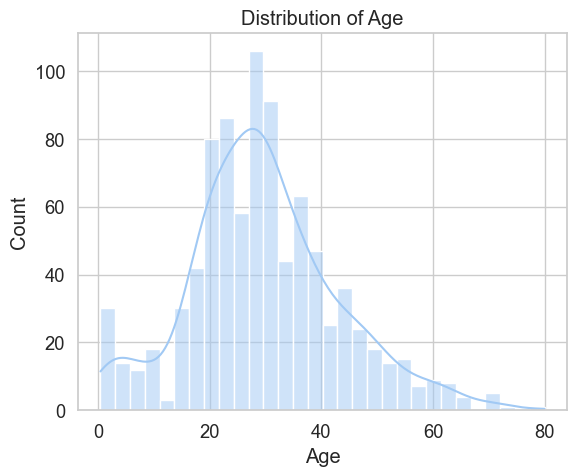

In [667]:
# Checking the distribution of Age after filling missing values
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes)
axes.set_title('Distribution of Age')
plt.tight_layout()
plt.show()

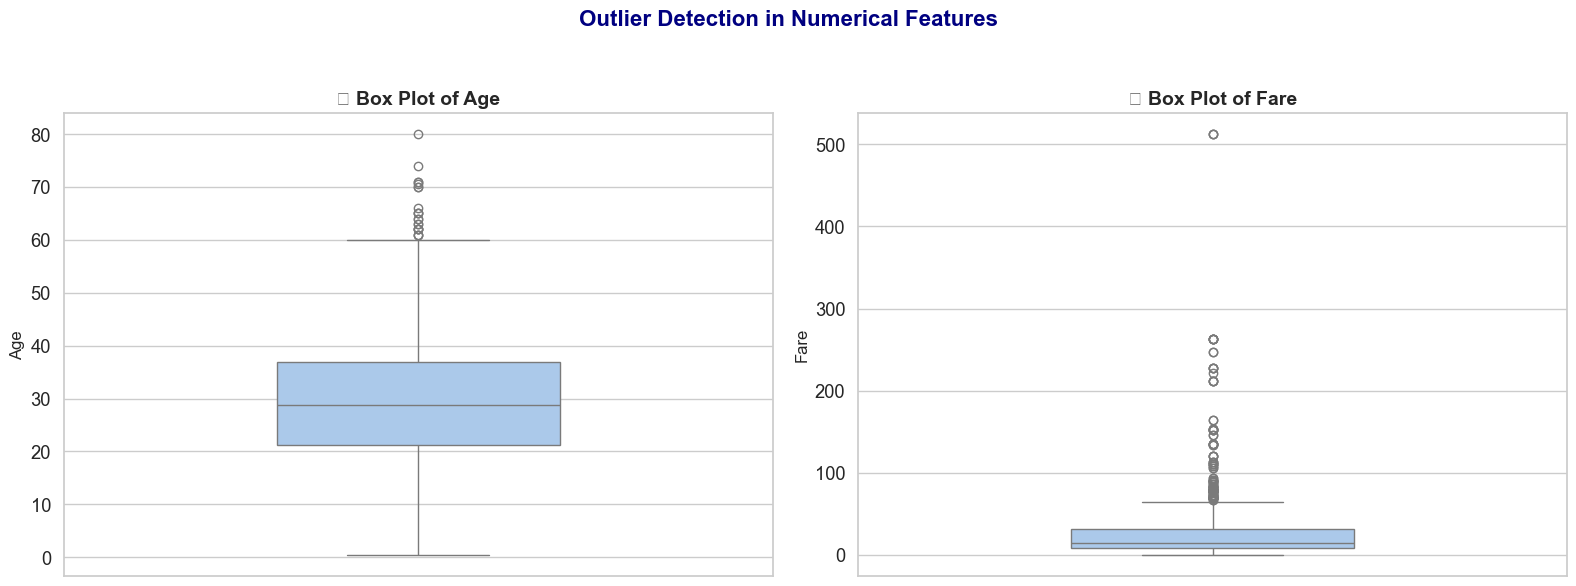

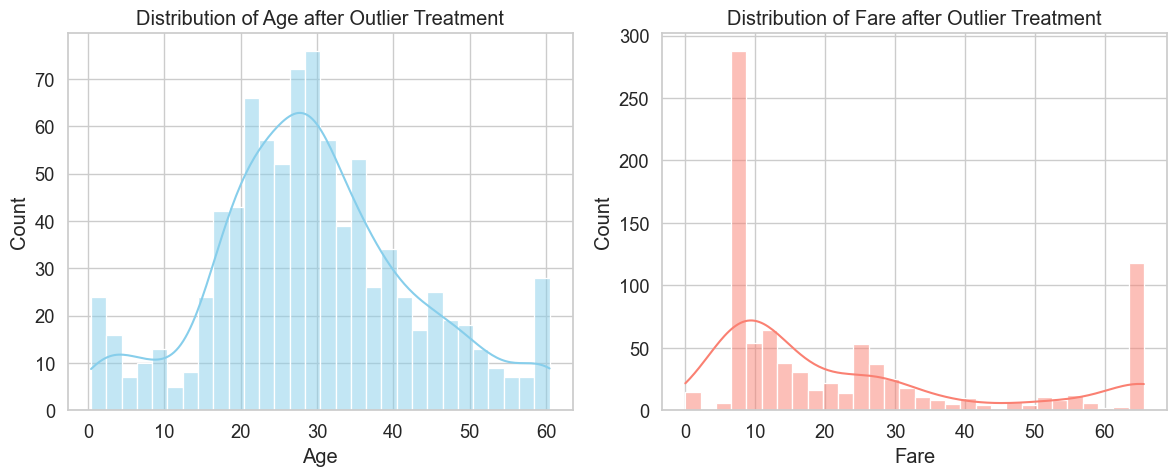

In [668]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Numerical features for outlier detection
numerical_features = ['Age', 'Fare']

# ✅ Set style for beautiful plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# ✅ Create subplots
fig, axes = plt.subplots(1, len(numerical_features), figsize=(16, 6))

for i, feature in enumerate(numerical_features):
    sns.boxplot(
        y=df[feature],
        ax=axes[i],
        width=0.4,
        flierprops=dict(marker='o', color='red', markersize=6)  # outliers red dots
    )
    axes[i].set_title(f'📦 Box Plot of {feature}', fontsize=14, weight="bold")
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].set_xlabel("")  # no x-label

# ✅ Adjust layout
plt.suptitle("Outlier Detection in Numerical Features", fontsize=16, weight="bold", color="navy")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# Outlier Treatment using IQR method
def treat_outliers_iqr(df, features):
    df_copy = df.copy()
    for feature in features:
        Q1 = df_copy[feature].quantile(0.25)
        Q3 = df_copy[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_copy[feature] = np.where(df_copy[feature] < lower_bound, lower_bound,
                                    np.where(df_copy[feature] > upper_bound, upper_bound, df_copy[feature]))
    return df_copy
df = treat_outliers_iqr(df, numerical_features)
df_test = treat_outliers_iqr(df_test, numerical_features)
# Checking the distribution of Age and Fare after outlier treatment
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age after Outlier Treatment')
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Fare after Outlier Treatment')
plt.tight_layout()
plt.show()

# 4. **Model Training and Evaluation of Training data only for the purpose of demonstration**

In [669]:
# Let's encode the categorical features using Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,65.6344,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [670]:
# Splitting the data into features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Classification Algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)                         # Train
    y_pred = model.predict(X_val)                       # Predict
    acc = accuracy_score(y_val, y_pred)                 # Accuracy
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

# ✅ Best Model
best_model = max(results, key=results.get)
print(f"\n🎯 Best Model: {best_model} with Accuracy = {results[best_model]:.4f}")


Logistic Regression: Accuracy = 0.8101
Decision Tree: Accuracy = 0.7318
Random Forest: Accuracy = 0.8101
Gradient Boosting: Accuracy = 0.8101
AdaBoost: Accuracy = 0.8101
K-Nearest Neighbors: Accuracy = 0.6257
Support Vector Machine: Accuracy = 0.6201
Naive Bayes: Accuracy = 0.7654

🎯 Best Model: Logistic Regression with Accuracy = 0.8101


# 5. **Making Predictions on the Test Set and Preparing Submission File**


In [671]:
# Checking for any missing values in the test dataset
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [672]:
# Fill the missing values in the Fare feature with the median value
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
# Again checking for any missing values in the test dataset
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [673]:
# ===============================
# Titanic ML + MLP Complete Code
# ===============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ----------------------------
# 1. Split features & target
# ----------------------------
X = df.drop(columns=['Survived'])
y = df['Survived']

# train-val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 2. Handle categorical features (One-Hot Encode)
# ----------------------------
X_all = pd.concat([X_train, X_val, df_test], axis=0)

# One-hot encoding (drop_first=True to avoid dummy trap)
X_all = pd.get_dummies(X_all, drop_first=True)

# Split back
X_train = X_all.iloc[:len(X_train)]
X_val   = X_all.iloc[len(X_train):len(X_train)+len(X_val)]
df_test = X_all.iloc[len(X_train)+len(X_val):]

# ----------------------------
# 3. Scale the features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
df_test_scaled = scaler.transform(df_test)

# ----------------------------
# 4. Train Multiple ML Models
# ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# ----------------------------
# 5. Build & Train MLP Neural Network
# ----------------------------
mlp = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)


history = mlp.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# Evaluate
mlp_acc = mlp.evaluate(X_val_scaled, y_val, verbose=0)[1]
results["MLP Neural Network"] = mlp_acc
print(f"MLP Neural Network Accuracy: {mlp_acc:.4f}")

# ----------------------------
# 6. Select Best Model
# ----------------------------
best_model_name = max(results, key=results.get)
print("\n🔥 Best Model:", best_model_name, "with Accuracy:", results[best_model_name])

# ----------------------------
# 7. Predict on Test Set
# ----------------------------
if best_model_name == "MLP Neural Network":
    test_preds = (mlp.predict(df_test_scaled) > 0.5).astype(int).ravel()
else:
    best_model = models[best_model_name]
    test_preds = best_model.predict(df_test_scaled)

# ----------------------------


Logistic Regression Accuracy: 0.8045
Random Forest Accuracy: 0.8101
Gradient Boosting Accuracy: 0.8101
KNN Accuracy: 0.8045
SVM Accuracy: 0.8156
Epoch 1/50
23/23 [==============================] - 1s 16ms/step - loss: 0.6340 - accuracy: 0.6812 - val_loss: 0.5622 - val_accuracy: 0.7598
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5164 - accuracy: 0.7907 - val_loss: 0.4690 - val_accuracy: 0.7989
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4440 - accuracy: 0.8076 - val_loss: 0.4458 - val_accuracy: 0.8045
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4403 - accuracy: 0.8090 - val_loss: 0.4422 - val_accuracy: 0.8045
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4304 - accuracy: 0.8076 - val_loss: 0.4305 - val_accuracy: 0.8101
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.4184 - accuracy: 0.8230 - val_loss: 0.4284 - val_accuracy: 0.8101
Epoch 7/50
23/

In [674]:
# Submission DataFrame banao
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],  # 👈 original test df se PassengerId lo
    "Survived": test_preds
})

#  First 5 rows check karo
print(submission.head())

#  Save as CSV
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file is ready! Upload this to Kaggle.")

   PassengerId  Survived
0          892         1
1          893         0
2          894         1
3          895         1
4          896         1
✅ submission.csv file is ready! Upload this to Kaggle.
